<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='blue'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [5]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446' -O 'DIP_HW2.zip'
!unzip DIP_HW2.zip

--2023-12-01 17:51:02--  https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445128 (435K) [application/octet-stream]
Saving to: ‘DIP_HW2.zip’

DIP_HW2.zip         100%[===================>] 434.70K  --.-KB/s    in 0.03s   

2023-12-01 17:51:03 (14.1 MB/s) - ‘DIP_HW2.zip’ saved [445128/445128]

Archive:  DIP_HW2.zip
  inflating: Blur_Hand.png           
  inflating: Hand.png                
  inflating: noisy_brain.png         


# Imports
<div dir=rtl>
<font color="blue" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [2]:
###

# ENTER YOUR CODE HERE.
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

###

# Any Helper Functions

<div dir=rtl>
<font color="blue" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [3]:
###

# ENTER YOUR CODE HERE.
def helperImshow(
    img,
    title: str,
    cmap: str = 'gray',
    vmin: int = 0,
    vmax: str = 255
):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(title, color='white', fontweight='bold', backgroundcolor='green')

    plt.axis('off')
    plt.show()

def helperImgesShow(
    imgs: dict, # {title: img}
    cmap: str = 'gray',
    vmin: int = 0,
    vmax: int = 255
):
    plt.figure(figsize=(30,10))

    i = 0
    for title, img in imgs.items():
        i = i + 1
        plt.subplot(2,5,i)
        plt.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.title(title, color='white', backgroundcolor='green')
        plt.axis('off')


###

# Question 5: Low Pass Filters (30%)

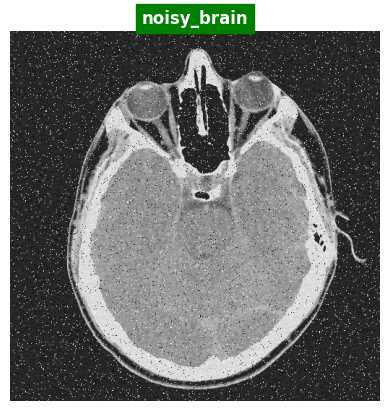

In [6]:
#@title Q5 - Part 1 (5%)
###

# ENTER YOUR CODE HERE.
noisy_brain = cv.imread("noisy_brain.png", cv.IMREAD_GRAYSCALE)
helperImshow(noisy_brain, "noisy_brain")
###

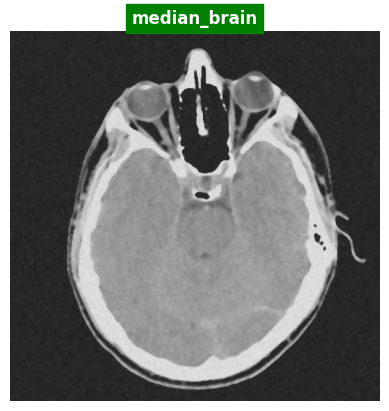

In [7]:
#@title Q5 - Part 2 (10%)
###

# ENTER YOUR CODE HERE.
median_brain = cv.medianBlur(noisy_brain, 5)
helperImshow(median_brain, "median_brain")

###

In [8]:
#@title Q5 - Part 3 (10%)

# NO CODE REQUIRED FOR THIS PART.

<div dir=rtl><font color='green' size="5">جواب سوال ۵-۳</font>
<div>

<div dir=rtl><font size="4"> دلیل استفاده از پدینگ این است که باعث میشود هنگام اعمال فیلتر اطلاعات گوشه ها و لبه های تصویر از بین نرود همچنین برای Convolution with
periodicity باید پدینگ را انجام داد تا جواب درست باشد و همچنین دلیل اینکه    تبدیل فوریه را به مرکز انتقال میدهند این است که با این کار باعث میشود تبدیل را راحت تر تحلیل کرد و دلیل دیگری که میتوان اشاره کرد این است که از آنجایی که کرنل ها معمولا در مرکزzero frequency دارند پس وقتی در تبدبل فوریه تصویر هم این مورد را اعمال کنیم نتیجه بهتری خواهیم گرفت. از نظر ریاضی نیز ضرب تبدیل فوریه تصویر و کرنلی که در مرکز zero frequency  هستند راحت تر است.
 </font><br />
</div>

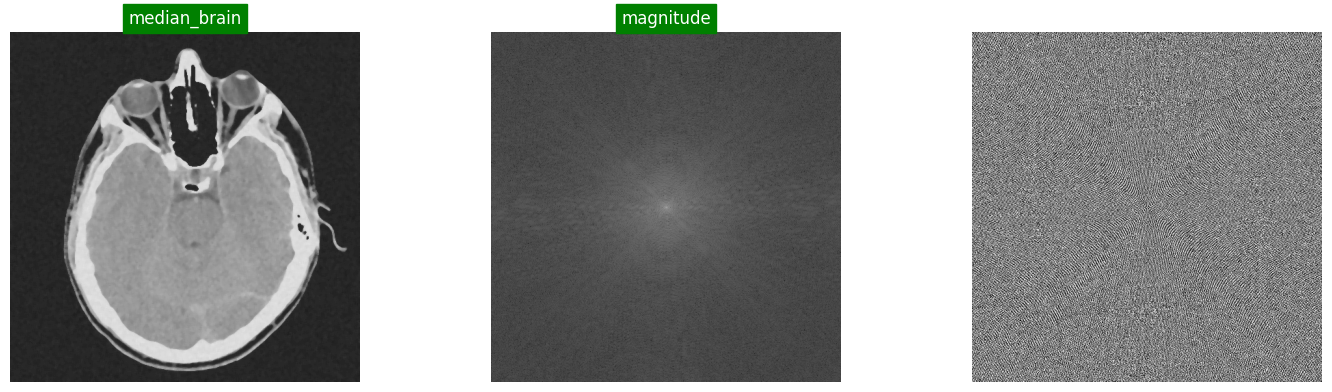

In [9]:
#@title Q5 - Part 4 (25%)
###

# ENTER YOUR CODE HERE.
dft_brain = np.fft.fft2(median_brain)
dft_shift = np.fft.fftshift(dft_brain)
magnitude_spectrum = 10*np.log(np.abs(dft_shift))
phase_spectrum = np.angle(dft_shift)



plt.figure(figsize=(30,10))

plt.subplot(2,5,1)
plt.imshow(median_brain, cmap='gray', vmin=0, vmax=255)
plt.title("median_brain", color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(magnitude_spectrum, cmap='gray', vmin=0, vmax=255)
plt.title("magnitude", color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(np.abs(phase_spectrum), cmap='gray', vmin=0, vmax=np.pi)
plt.axis('off')
plt.show()

###

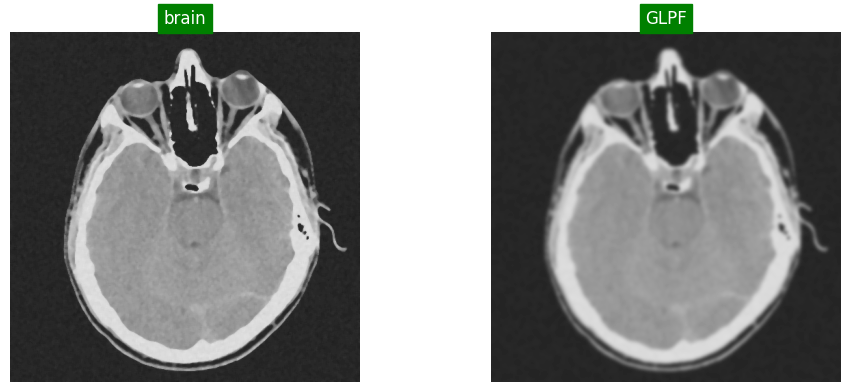

In [10]:
#@title Q5 - Part 5 (30%)
###

# ENTER YOUR CODE HERE.
def gaussianLPF(shape, D0):
    rows, cols = shape
    center = (rows // 2, cols // 2)
    y, x = np.ogrid[:rows, :cols]
    filter = np.exp(-((x - center[1])**2 + (y - center[0])**2) / (2 * (D0**2)))
    return filter


dft_brain = np.fft.fft2(median_brain)
dft_shift = np.fft.fftshift(dft_brain)

glpf_dft_image = dft_shift * gaussianLPF(shape=median_brain.shape, D0=32)
glpf_idft_image = np.abs(np.fft.ifft2(np.fft.ifftshift(glpf_dft_image))).clip(0,255).astype(np.uint8)

helperImgesShow(
    imgs={
        'brain': median_brain,
        'GLPF': glpf_idft_image
    }
)

###


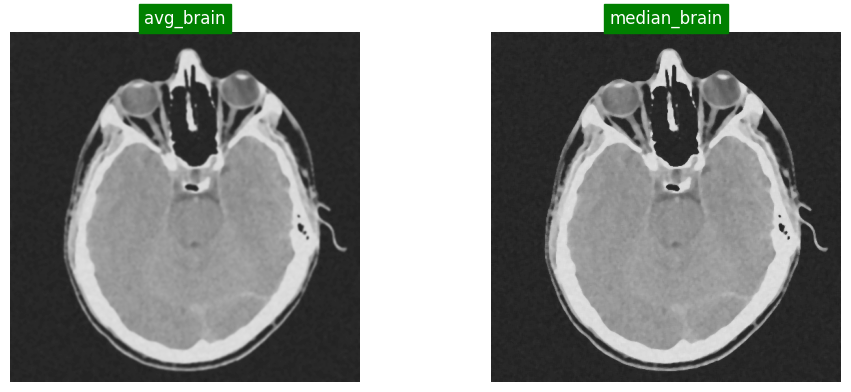

In [11]:
#@title Q5 - Part 6 (10%)
###
# a kernel of 5x5 size
avg_brain = cv.GaussianBlur(median_brain, (5,5), 0)
helperImgesShow(
    imgs={
        'avg_brain': avg_brain,
        'median_brain': median_brain
    }
)


###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۶</font>
<div>
<font size="4">این فیلتر باعث میشود تصویر به دست آمده نسبت به تصویر اولیه blur تر یا تارتر شود
 </font><br />
</div>

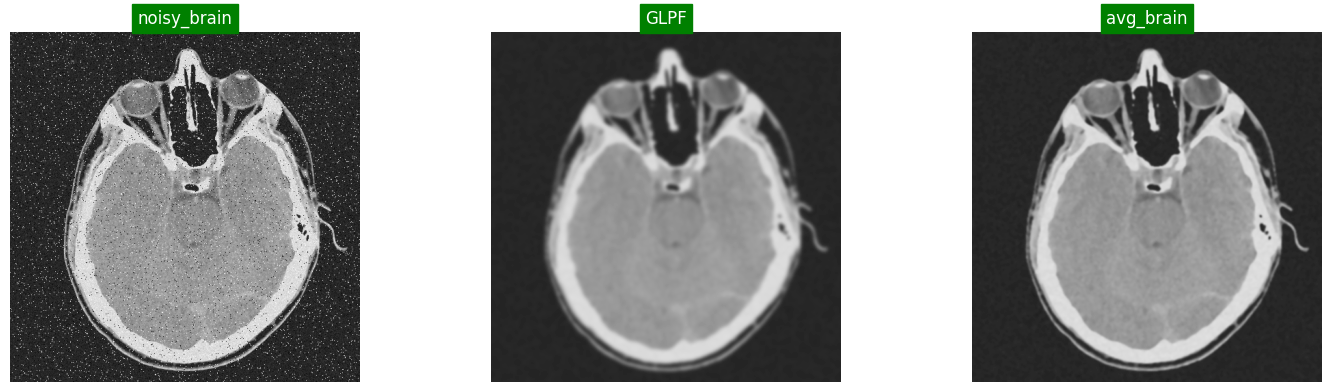

In [12]:
#@title Q5 - Part 7 (10%)
###
helperImgesShow(
    imgs={
        'noisy_brain': noisy_brain,
        'GLPF': glpf_idft_image,
        'avg_brain': avg_brain,
    }
)


###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۷</font>
<div>این دو فیلتر درواقع یک کار مشابه انجام میدهند و اما یکی در حوزه فرکانس دیگری حوزه مکان اما با توجه به نتایج به دست آمده و شدت تار بودن تصویر به دست آمده از GLPF میتوان گفت استفاده از GaussianBlur نتیجه بهتری داشته است.
<font size="4">
 </font><br />
</div>

# Question 6: High Pass Filters (30%)

In [13]:
#@title Q6 - Part 1 (15%)
###
def laplacian_filter(img, angle_degree):
    if angle_degree == 45:
        filter = np.array([
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0]
        ])
    elif angle_degree == 90:
        filter = np.array([
            [1, 1, 1],
            [1, -8, 1],
            [1, 1, 1]
        ])

    # padding
    row, col = img.shape
    krow, kcol = filter.shape
    p = krow // 2

    padded_img = np.zeros((row+2*p, col+2*p))
    padded_img[p:row+p, p:col+p] = img

    # convolution
    filtered_img = np.zeros_like(img)
    for r in range(row):
        for c in range(col):
            filtered_img[r, c] = np.sum(filter * padded_img[r:r+krow, c:c+kcol]).clip(0,255).astype(np.uint8)

    return filtered_img

###

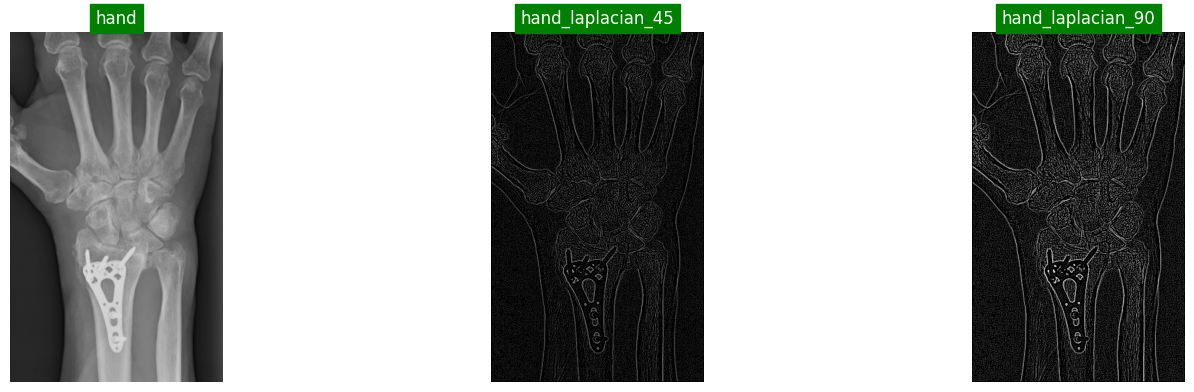

In [14]:
#@title Q6 - Part 2 (15%)
###
hand = cv.imread("Hand.png", cv.IMREAD_GRAYSCALE)
hand_laplacian_45 = laplacian_filter(hand, 45)
hand_laplacian_90 = laplacian_filter(hand, 90)

helperImgesShow(
    imgs={
        'hand': hand,
        'hand_laplacian_45': 20*np.power(hand_laplacian_45, 0.5),
        'hand_laplacian_90': 20*np.power(hand_laplacian_90, 0.5),
    }
)

###

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۶-۲</font>
<div>

<div dir=rtl><font size="4">
تصویر به دست آمده از لاپلاسن 90 درجه واضح تر از 45 درجه است همچنین هر دو فیلتر برای پیدا کردن لبه ها طراحی شده اند با این تفاوت که لاپلاسین 45 درجه برای پیدا کردن لبه ها با زاویه 45 درجه خوب عمل میکند و 90 درجه برای  پیدا کردن لبه های افقی و عمودی خوب عمل میکند
 </font><br />
</div>

In [15]:
#@title Q6 - Part 3 (40%)
###

# ENTER YOUR CODE HERE.
import numpy as np
import matplotlib.pyplot as plt

def ideal_highpass_filter(size, D0):
    rows, cols = size
    center = (rows // 2, cols // 2)
    y, x = np.ogrid[:rows, :cols]
    radius = (x - center[1]) + (y - center[0])
    filter = np.ones_like(radius)
    filter[radius < D0] = 0
    return filter

def butterworth_highpass_filter(size, D0, order=2):
    rows, cols = size
    center = (rows // 2, cols // 2)
    y, x = np.ogrid[:rows, :cols]
    radius = (x - center[1]) + (y - center[0])
    filter = 1 - (1 / (1 + (radius / D0)**(2 * order)))
    return filter

def apply_frequency_filter(image, filter_type, D0):

    dft_img = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft_img)
    size = image.shape

    if filter_type == 'IHPF':
        frequency_filter = ideal_highpass_filter(size, D0)
    elif filter_type == 'BHPF':
        frequency_filter = butterworth_highpass_filter(size, D0)

    filtered_dft_image = dft_shift * frequency_filter
    filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_dft_image))).clip(0,255).astype(np.uint8)

    return filtered_image


###

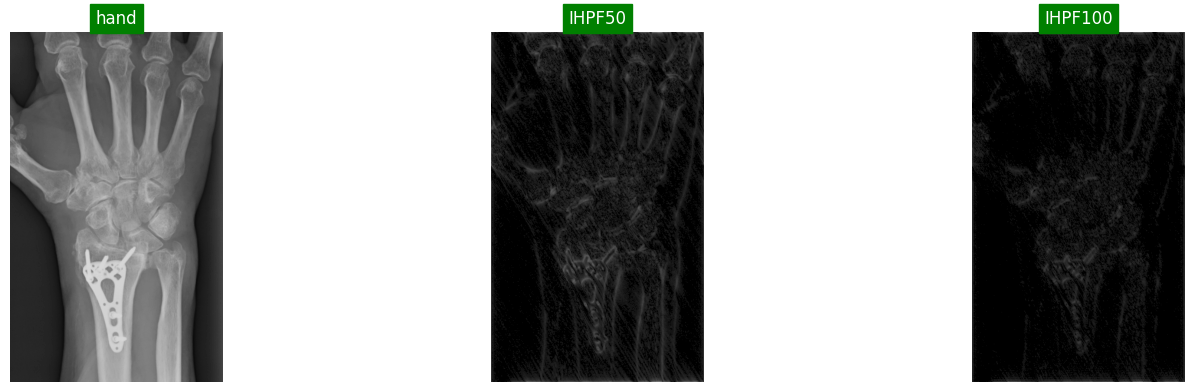

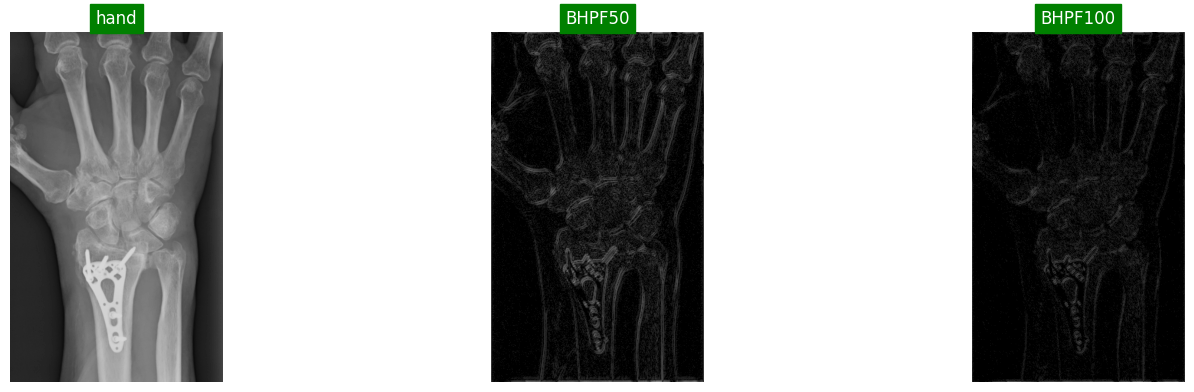

In [16]:
#@title Q6 - Part 4 (15%)
###

IHPF50 =apply_frequency_filter(hand, 'IHPF', 50)
BHPF50 = apply_frequency_filter(hand, 'BHPF', 50)
IHPF100 =apply_frequency_filter(hand, 'IHPF', 100)
BHPF100 = apply_frequency_filter(hand, 'BHPF', 100)

helperImgesShow(
    imgs={
        'hand': hand,
        'IHPF50': 20*np.power(IHPF50, 0.5),
        'IHPF100': 20*np.power(IHPF100, 0.5),
    }
)

helperImgesShow(
    imgs={
        'hand': hand,
        'BHPF50': 20*np.power(BHPF50, 0.5),
        'BHPF100': 20*np.power(BHPF100, 0.5),
    }
)


###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۶-۴</font>
<div>
<font size="4">طبق اسلایدهای درسی BHPF در مقایسه با IBHF نتیجه را smooth تر میکند همجنین این موضوع را از مقایسه تصاویر نیز میتوان دید این راه هم باید ذکر کنم که برای بهتر دیدن تصاویر خروجی آنها را به توان رسانده ام
 </font><br />
</div>

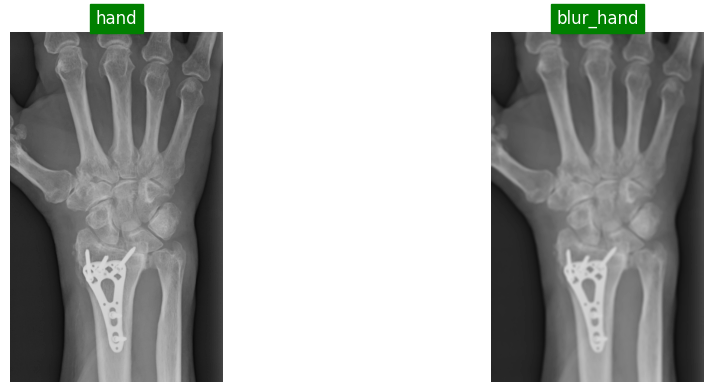

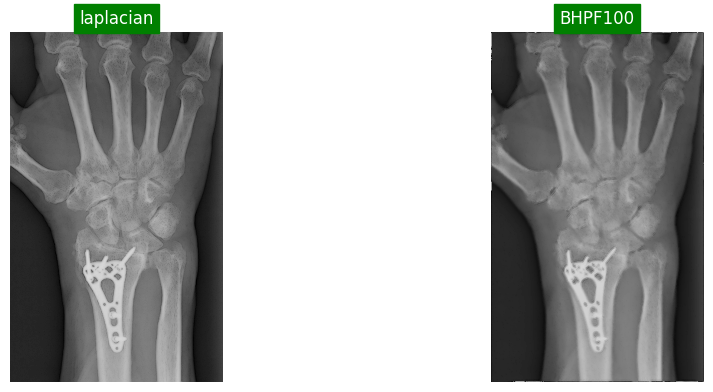

In [17]:
#@title Q6 - Part 5 (15%)
###

blurHand = cv.imread("Blur_Hand.png", cv.IMREAD_GRAYSCALE)
laplacian = blurHand - 1.5 * laplacian_filter(hand, 45)
BHPF100 = blurHand - 4 * apply_frequency_filter(hand, 'BHPF', 100)

helperImgesShow(
    imgs={
        'hand': hand,
        'blur_hand': blurHand,
    }
)

helperImgesShow(
    imgs={
        'laplacian': laplacian,
        'BHPF100': BHPF100,
    }
)

###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۶-۵</font>
<div>
<font size="4">
متن مورد نظر در این جا نوشته شود.(برای نوشتن دوبار اینجا کلیک کنید)

 برای رفتن به خط بعد، دو بار اینتر بزنید.
 </font><br />
</div>